# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammmad Wira Ferdiansyah Liambo
- **Email:** wiraaferdiansyah@gmail.com
- **ID Dicoding:** wiraferdiansyah

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan total selama periode waktu tertentu ?
- Kategori produk apa yang paling banyak terjual ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
**Membaca orders_dataset**

In [2]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Membaca order_items_dataset**

In [3]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Membaca products_dataset**

In [4]:
products_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Membaca order_payments_dataset**

In [5]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Membaca customers_dataset**

In [6]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Membaca geolocation_dataset**

In [7]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Membaca order_reviews_dataset**

In [8]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Membaca sellers_dataset**

In [9]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/wiraaferdiansyah/E-Commerce-Dataset/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Menilai Data orders_df**

In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat beberapa masalah pada orders_df yaitu :
- Kolom order_puchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya direpresentasikan sebagai tipe data **datetime**
- Terdapat perbedaan jumlah data pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Hal ini menunjukkan adanya missing value. Untuk memastikan jumlah missing value. Kita menjalankan kode dibawah.

In [11]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Kode ini menampilkan jumlah missing value dari 3 Kolom. Selanjutnya kita akan memeriksa duplikasi data dengan menjalankan kode berikut :

In [12]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Menilai Data order_items_df**

In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Informasi diatas menunjukkan tidak adanya missing value yang terjadi. Namun, kolom shipping_limit_date seharusnya direpresentasikan dengan tipe data **datetime**.

Selanjutnya kita akan mengecek jumlah duplikasi data yang terjadi :

In [14]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


Kode diatas menunjukkan tidak ada duplikat data.

Sekarang kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam order_items_df.

In [15]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari informasi diatas, tidak ada keanehan yang terjadi dalam parameter statistiknya.

**Menilai Data products_df**

In [16]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Jika diperhatikan, terdapat missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm. Lalu, jika melihat record pada setiap kolom yang bertipe float ternyata tidak ditemukan angka dibelakang koma yang menunjukkan kespesifikkan pada angka, sehingga alangkah lebih baik diubah menjadi tipe int.

Kode dibawah menampilkan jumlah missing value :

In [17]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Selanjutnya kita periksa apakah ada duplikasi data :

In [18]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak terdapat duplikasi data. Sekarang kita periksa parameter statistiknya :

In [19]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak terdapat keanehan pada parameter statistiknya

**Menilai Data order_payments_df**

In [20]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak ada masalah dengan tipe data dari seluruh kolom tersebut.

Selanjutnya kita mengecek apakah ada duplikasi yang terjadi.

In [21]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Hal ini menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistik dari order_payments_df.

**Menilai Data customers_dataset**

In [23]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak terdapat missing value dan juga kesalahan tipe data

In [24]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Menilai Data geolocation_dataset**

In [25]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak terdapat missing value dan juga kesalahan tipe data

In [26]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


Hal ini menunjukkan banyak terdapat duplikasi data pada dataset geolocation

In [27]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Tidak terdapat masalah

**Menilai Data order_reviews_dataset**

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan informasi diatas, ternyata terdapat missing value dan juga review_creation_date dan review_answer_timestamp seharusnya direpresentasikan dengan menggunakan tipe data **datetime**

In [29]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Informasi diatas menunjukkan jumlah missing value

In [30]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tidak ada keanehan dalam parameter statistiknya

**Menilai Data sellers_dataset**

In [32]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Dari informasi diatas, tidak ditemukan adanya missing value dan kesalahan tipe data

In [33]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak terdapat keanehan dalam parameter statistiknya

### Cleaning Data

**Membersihkan data orders_df**
- **Ubah tipe data**
Kita akan mengatasi permasalahan pada orders_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom order_puchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date

In [35]:
timestamp_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
    
for column in timestamp_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [36]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


- **Menangani missing value**
Masalah berikutnya yang harus kita tangani ialah missing value pada beberapa kolom. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [37]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Berdasarkan tabel di atas, dapat dilihat bahwa baris data tersebut yang kurang mendandung informasi pada beberapa kolom penting. Oleh karena itu, pada kasus ini, kita akan menggunakan metode dropping untuk menangani missing value.

In [38]:
orders_df.dropna(axis=0, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Membersihkan data order_items_df**
- **Ubah tipe data**
Kita akan mengatasi permasalahan pada order_items_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom shipping_limit_date.

In [39]:
timestamp_columns = ["shipping_limit_date"]
    
for column in timestamp_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [40]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Membersihkan data products_df**
- **Menangani missing value**
Masalah berikutnya yang harus kita tangani ialah missing value pada beberapa kolom. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [41]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Berdasarkan tabel di atas, dapat dilihat bahwa baris data tersebut yang kurang mendandung informasi pada beberapa kolom penting. Oleh karena itu, pada kasus ini, kita akan menggunakan metode dropping untuk menangani missing value.

In [43]:
products_df.dropna(axis=0, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


- **Ubah tipe data**
Kita akan mengatasi permasalahan pada products_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm lebih baik menggunakan tipe data int.

In [44]:
convert = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
    
for column in convert:
    products_df[column] = products_df[column].astype(int)

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32340 non-null  object
 1   product_category_name       32340 non-null  object
 2   product_name_lenght         32340 non-null  int32 
 3   product_description_lenght  32340 non-null  int32 
 4   product_photos_qty          32340 non-null  int32 
 5   product_weight_g            32340 non-null  int32 
 6   product_length_cm           32340 non-null  int32 
 7   product_height_cm           32340 non-null  int32 
 8   product_width_cm            32340 non-null  int32 
dtypes: int32(7), object(2)
memory usage: 1.6+ MB


**Membersihkan data geolocation_df**
- **Hapus duplikasi data**
Kita akan menghapus duplikasi data yang ada

In [46]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Membersihkan data order_reviews_df**
- **Ubah tipe data**
Kita akan mengatasi permasalahan pada geolocation_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom review_answer_timestamp, dan review_answer_timestamp

In [47]:
timestamp_columns = ["review_creation_date", "review_answer_timestamp"]
    
for column in timestamp_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


- **Menangani missing value**
Masalah berikutnya yang harus kita tangani ialah missing value pada beberapa kolom. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

In [48]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [49]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


Berdasarkan informasi diatas, alangkah baiknya kita menggunakan metode imputation dengan mengambil nilai modus dari data

In [50]:
mode_comment_message = order_reviews_df['review_comment_message'].mode()[0]
mode_comment_title = order_reviews_df['review_comment_title'].mode()[0]

order_reviews_df['review_comment_message'].fillna(mode_comment_message, inplace=True)
order_reviews_df['review_comment_title'].fillna(mode_comment_title, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1820\4206686074.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df['review_comment_message'].fillna(mode_comment_message, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1820\4206686074.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [51]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explorasi Data products_df dan order_items_df
Kita akan melihat rangkuman parameter statistik dari data products_df dan order_items_df menggunakan method describe().

In [52]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [53]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Berdasarkan hasil diatas, rata-rata harga produk adalah 120.65 dengan harga tertinggi product adalah 6735, disamping itu jumlah penjualan yaitu 112650 yang menandakan tingginya penjualan selama periode rentang waktu data

Kode dibawah akan menampilkan kategori produk apa sajanyang dijual

In [54]:
unique_categories = products_df['product_category_name'].unique()

# Menampilkan nilai-nilai unik
print(unique_categories)

['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_place'
 'la_cuisine' 'construca

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan total selama periode waktu tertentu ?

In [55]:
# Gabungkan tabel order_items, products, dan orders berdasarkan kolom kunci yang sesuai
merged_data = pd.merge(order_items_df, products_df, on='product_id', how='left')
merged_data = pd.merge(merged_data, orders_df, on='order_id', how='left')

In [56]:
# Hitung total penjualan untuk setiap produk dengan menambahkan product_category_name
total_sales_per_product = merged_data.groupby(['product_id', 'product_category_name'])['price'].sum().reset_index()

print(total_sales_per_product)

                             product_id        product_category_name   price
0      00066f42aeeb9f3007548bb9d3f33c38                   perfumaria  101.65
1      00088930e925c41fd95ebfe695fd2655                   automotivo  129.90
2      0009406fd7479715e4bef61dd91f2462              cama_mesa_banho  229.00
3      000b8f95fcb9e0096488278317764d19        utilidades_domesticas  117.80
4      000d9be29b5207b54e86aa1b1ac54872           relogios_presentes  199.00
...                                 ...                          ...     ...
32335  fff6177642830a9a94a0f2cba5e476d1                   cool_stuff  229.98
32336  fff81cc3158d2725c0655ab9ba0f712c                 beleza_saude   90.00
32337  fff9553ac224cec9d15d49f5a263411f  fashion_bolsas_e_acessorios   32.00
32338  fffdb2d0ec8d6a61f0a0a0db3f25b441       informatica_acessorios  169.95
32339  fffe9eeff12fcbd74a2f2b007dde0c58                   brinquedos  249.99

[32340 rows x 3 columns]


In [57]:
monthly_orders_df = merged_data.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09,1,134.97
1,2016-10,270,40941.30
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,748,111712.47


**Tentukan tren penjualan total selama periode waktu tertentu misalnya, tahunan**

In [58]:
yearly_sales_trend = merged_data.set_index('order_purchase_timestamp').resample('YE')['price'].sum()

print(yearly_sales_trend)

order_purchase_timestamp
2016-12-31      41087.17
2017-12-31    5960756.28
2018-12-31    7217202.23
Name: price, dtype: float64


### Pertanyaan 2: Kategori produk apa yang paling banyak terjual dan paling sedikit terjual ?

In [59]:
# Mengelompokkan product_category_name dan menghitung jumlah kemunculan
category_counts = merged_data.groupby('product_category_name').size().reset_index(name='count')

# Menentukan produk dengan penjualan terbanyak dan terdikit
most_sold_product = category_counts.loc[category_counts['count'].idxmax()]
least_sold_product = category_counts.loc[category_counts['count'].idxmin()]

print("Produk yang paling banyak terjual:")
print("Nama Kategori:", most_sold_product['product_category_name'])
print("Jumlah Penjualan:", most_sold_product['count'])

print("\nProduk yang sedikit terjual:")
print("Nama Kategori:", least_sold_product['product_category_name'])
print("Jumlah Penjualan:", least_sold_product['count'])

Produk yang paling banyak terjual:
Nama Kategori: cama_mesa_banho
Jumlah Penjualan: 11115

Produk yang sedikit terjual:
Nama Kategori: seguros_e_servicos
Jumlah Penjualan: 2


In [60]:
monthly_orders_df = merged_data.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B %Y')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,September 2016,1,134.97
1,October 2016,270,40941.30
2,November 2016,0,0.00
3,December 2016,1,10.90
4,January 2017,748,111712.47


**Membuat line chart untuk memvisualisasikan pertanyaan 1**

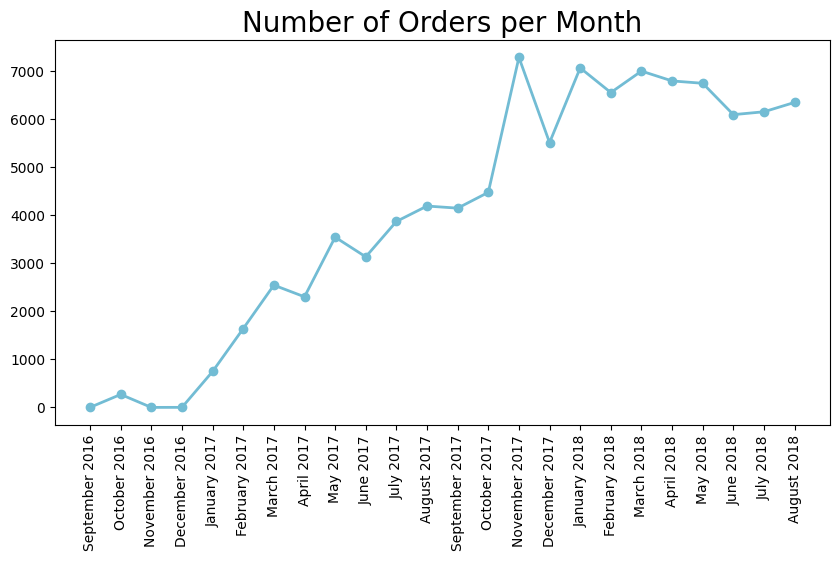

In [61]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=90 ) 
plt.yticks(fontsize=10) 
plt.show()

**Membuat line chart untuk memvisualisasikan pertanyaan 2**

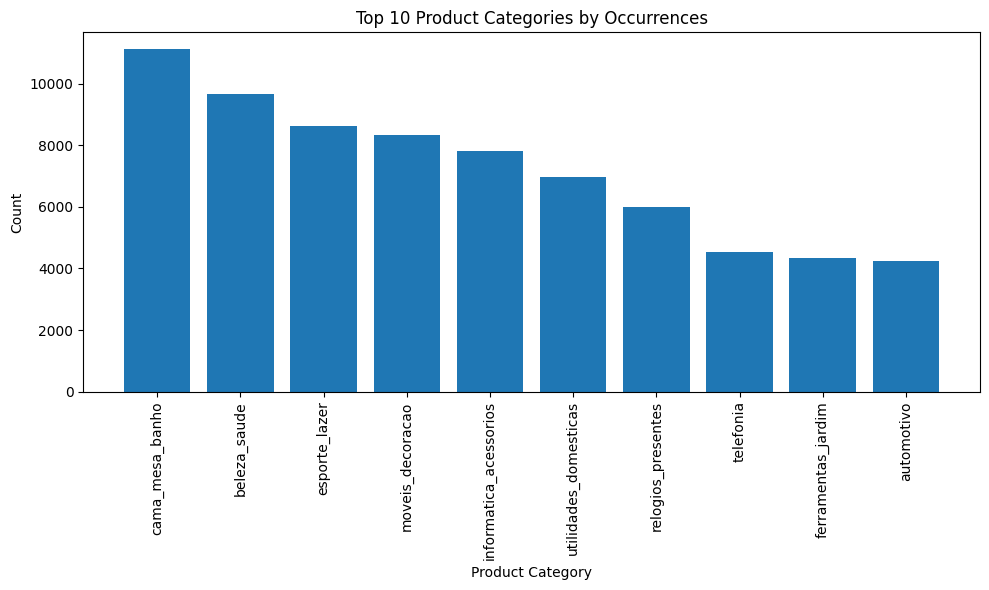

In [62]:
category_counts_sorted = category_counts.sort_values(by='count', ascending=False)

top_categories = category_counts_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_categories['product_category_name'], top_categories['count'])
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Top 10 Product Categories by Occurrences')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

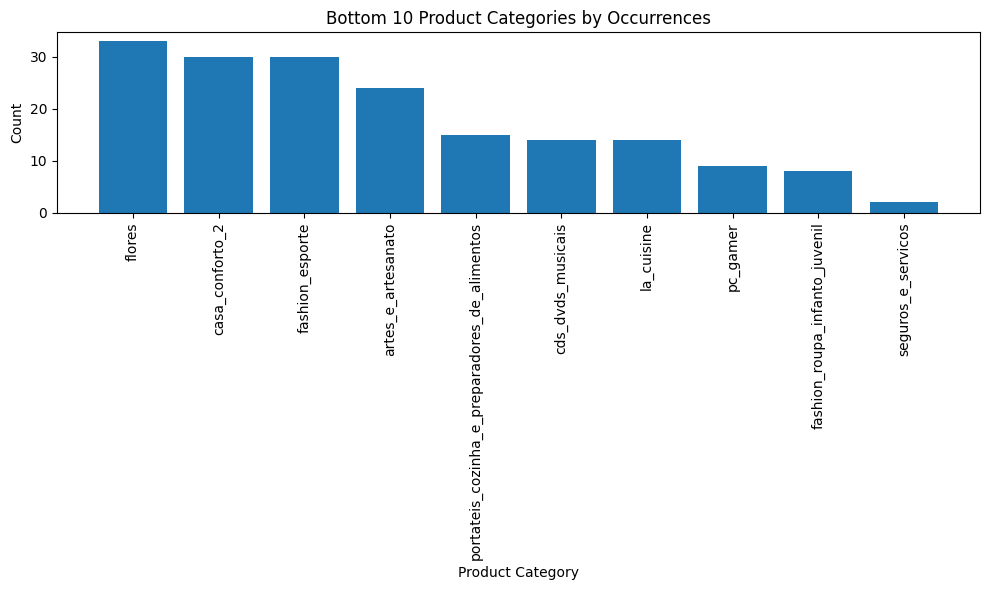

In [63]:
bottom_categories = category_counts_sorted.tail(10)

plt.figure(figsize=(10, 6))
plt.bar(bottom_categories['product_category_name'], bottom_categories['count'])
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Bottom 10 Product Categories by Occurrences')
plt.xticks(rotation=90)  # Menambahkan label sumbu x dengan rotasi 90 derajat
plt.tight_layout()
plt.show()

## Conclusion

- **Conclution pertanyaan 1**
adalah Grafik penjualan menampilkan tren yang sangat baik dalam periode waktu yang diamati, Terlihat kenaikan yang konsisten dalam penjualan. Hal ini menunjukkan pertumbuhan bisnis yang baik dan berkembang.

- **Conclution pertanyaan 2** adalah Berdasarkan data yang di analisis, terlihat bahwa ada perbedaan yang cukup besar dalam penjualan antara kategori produk yang paling banyak terjual dan yang paling sedikit. Jadi, kategori produk yang paling laris adalah yang untuk cama, mesa, dan banho, seperti perlengkapan tidur dan perlengkapan rumah tangga lainnya, dengan jumlah penjualan mencapai 11.115 unit. Sementara itu, kategori produk yang kurang diminati adalah yang berkaitan dengan seguros dan servicos, mungkin ini produk-produk asuransi atau layanan lainnya, dengan penjualan hanya 2 unit. Dari hal tersebut, sebaiknya perusahaan memperbaiki strategi marketing mereka dalam mempromosikan produk yang kurang laku agar pendapatan perusahaan lebih tinggi.

## Menyimpan berkas data yang telah dibersihkan

In [65]:
merged_data.to_csv("all_data.csv", index=False)